In this notebook, will try predicts heart disease from a sample datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Tree Models')

In [ ]:
# importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the file and putting it into df objects
df = pd.read_csv('heart_v2.csv')

In [ ]:
# checking the columns
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [ ]:
#checking the head of the data

df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
# putting the feature variable to X

X= df.drop('heart disease', axis =1)

#putting the response variable to y]

y = df['heart disease']

In [ ]:
# now splitting the data into train and test set


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7 , test_size = .3 , random_state =42)

In [ ]:
#checking the shape X data set
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyper parameter apart from max_depth =3 so that we can plot and read the tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth =3)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# importing required packages for visualization

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

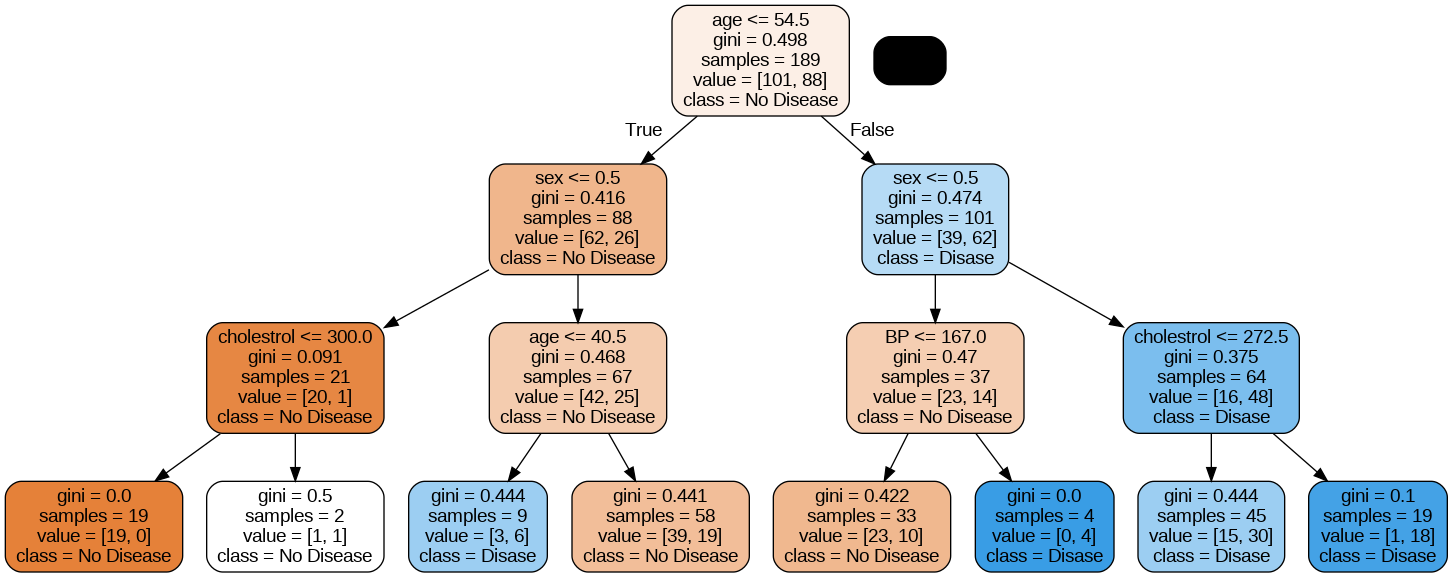

In [ ]:
# plotting the tree with max_depth = 3

dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded = True, feature_names = X.columns, class_names= ('No Disease', 'Disase'))

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Evaluating the model performance

In [ ]:
# predicting the the values of y

y_train_pred = dt.predict(X_train)

y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
# accuracy_score train data

accuracy_score(y_train, y_train_pred)

0.7407407407407407

In [ ]:
# confusion matrix of  train data

confusion_matrix(y_train, y_train_pred)

array([[82, 19],
       [30, 58]])

In [ ]:
# accuracy_score of test data

accuracy_score(y_test, y_test_pred)

0.6049382716049383

In [ ]:
# confusion matrix of test data

confusion_matrix(y_test, y_test_pred)

array([[35, 14],
       [18, 14]])

Conclusion

In this project, we built a Decision Tree Classifier to predict the presence of heart disease based on patient attributes like age, sex, blood pressure, and cholesterol levels.

Dataset: 270 patient records with 4 features and a binary target (heart disease: yes/no).

Data Split: 70% training (189 samples), 30% testing (81 samples).

🔹 Model Training

We trained a Decision Tree with max_depth=3 for interpretability.

Training Accuracy: ~74%

Test Accuracy: ~60%

🔹 Results Analysis

The tree was easy to visualize and interpret:

Younger + female + lower cholesterol → mostly No Disease.

Older + male + high cholesterol / high BP → mostly Disease.

Confusion Matrix (Test Set) showed:

14 True Positives (disease correctly detected).

18 False Negatives (missed disease cases → critical issue in healthcare).

The model performed better at predicting No Disease than correctly identifying Disease cases.

🔹 Strengths

Simple, interpretable model.

Visual decision rules make it useful for explanation in medical settings.

🔹 Limitations

Accuracy dropped on test data (74% → 60%), showing overfitting.

High False Negatives → dangerous for real medical use.

Only 4 features used; real diagnosis depends on more complex clinical data.